## **GARCH Performance**

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Import df
vols = pd.read_csv('garch_index_vol.csv')

In [5]:
# Function to plot comparison between actual and predicted
def plot_vols(actual, pred, dates, labels, colors):

    plt.rcParams["figure.figsize"] = (15,11)
    xticks = [dates[i] for i in list(range(0, len(dates), 12))]

    plt.plot(dates, actual, label=labels[0], color=colors[0], alpha=0.4)
    plt.plot(dates, pred, label=labels[1], color=colors[1])

    # Add a legend and title to the plot
    plt.xticks(list(range(0, len(dates), 12)), xticks, rotation=45, ha='right')
    plt.legend(prop={'size': 15})
    plt.title(f"Volatility Comparison")

    # Add vertical lines at each year
    for date in list(range(0, len(dates), 12)):
        plt.axvline(date, color='black', linestyle='--', alpha=0.1)

    # Show the plot
    plt.show()

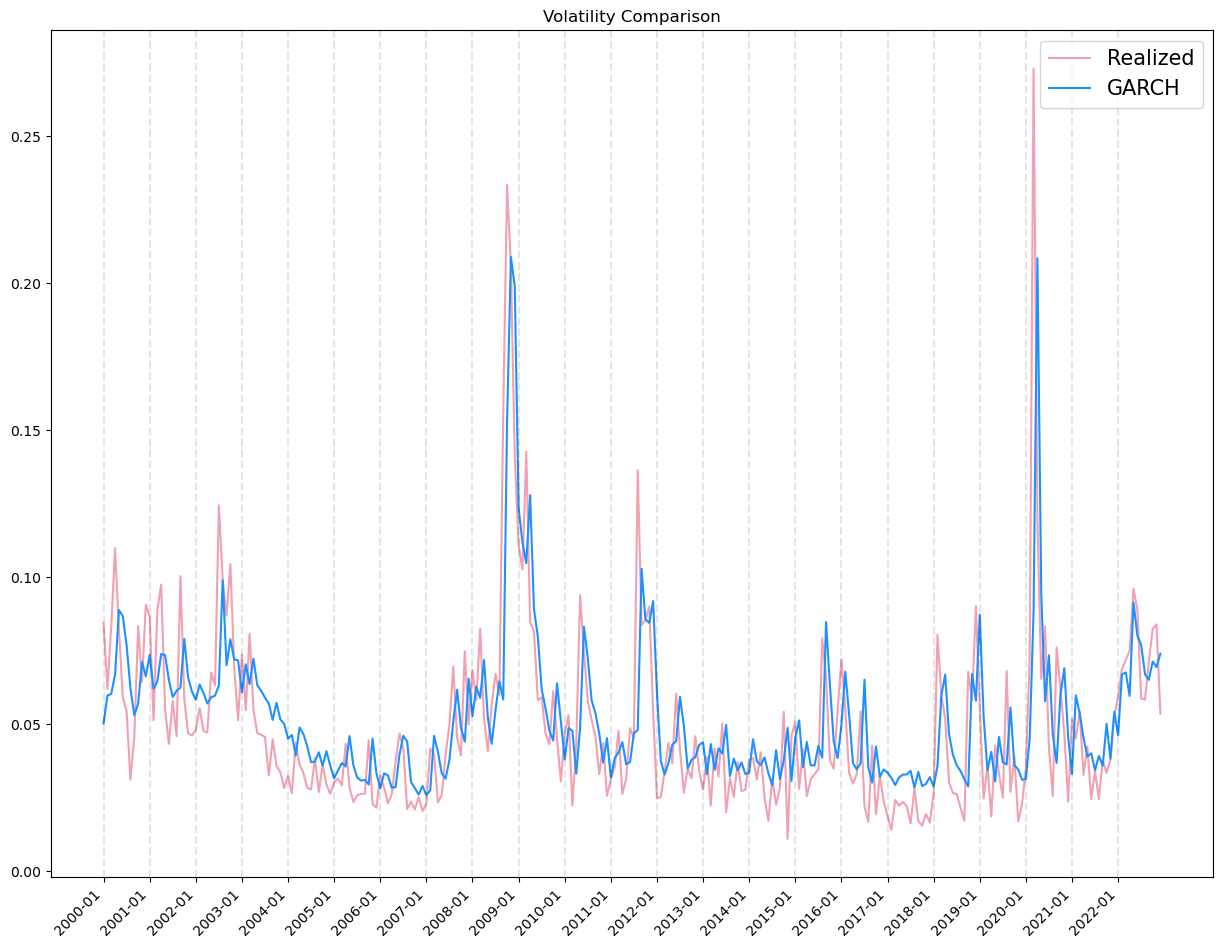

In [6]:
# Plot comparison between Actual volatility and GARCH
plot_vols(vols.volatility_actual, vols.volatility_predicted, vols.datadate, ['Realized', 'GARCH'], ['crimson', 'dodgerblue'])

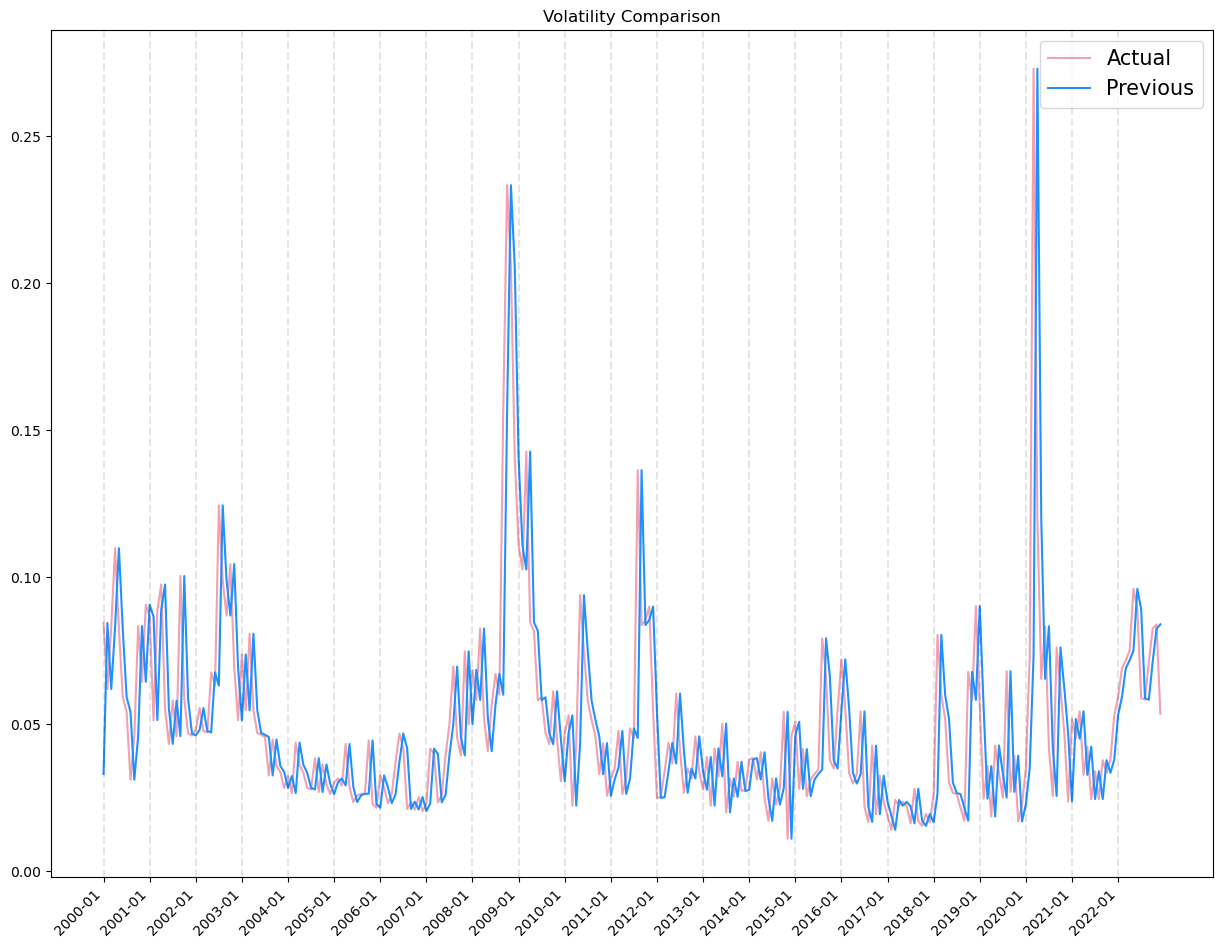

In [7]:
# Plot comparison between Actual volatility and Previous Month volatility
plot_vols(vols.volatility_actual, vols.volatility_1m, vols.datadate, ['Actual', 'Previous'], ['crimson', 'dodgerblue'])

In [8]:
from sklearn.metrics import max_error, mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

# Function to compare regression metrics
def regression_comparison(df, actual_col, comp_cols, index_labels):

    # Select relevant columns from the DataFrame
    data = df[comp_cols + [actual_col]]

    # Create a DataFrame to store the statistics
    statistics = pd.DataFrame()

    # Calculate and store each metric
    statistics['R-Squared'] = [r2_score(data[actual_col], data[pred_col]) for pred_col in comp_cols]
    statistics['Root Mean Squared Error'] = [mean_squared_error(data[actual_col], data[pred_col], squared=False) for pred_col in comp_cols]
    statistics['Mean Squared Log Error'] = [mean_squared_log_error(data[actual_col], data[pred_col]) for pred_col in comp_cols]
    statistics['Max Error'] = [max_error(data[actual_col], data[pred_col]) for pred_col in comp_cols]

    # Set the prediction column names as index
    statistics.index = index_labels

    return statistics

# Apply
stats_reg = regression_comparison(vols, "volatility_actual", ["volatility_predicted", "volatility_1m"], ["GARCH (1,1)", "Previous Month Volatility"])
stats_reg

,R-Squared,Root Mean Squared Error,Mean Squared Log Error,Max Error
"GARCH (1,1)",0.476033,0.023233,0.000446,0.184924
Previous Month Volatility,0.306401,0.026730,0.000585,0.199649
